In [25]:
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import re

In [3]:
filename = 'formatted_' + input() + '.txt'

In [4]:
# retrieve data from data.txt
raw_data = open('data.txt', 'r')
formatted_data = open(filename, 'w')

# format data into array and write to formatted_data
for line in raw_data:
    arr = line.split('\t')
    if len(arr) == 4 and 'Posted' not in arr:
        ln = arr[0] + ' | ' + arr[-1][:-1] + '\n'
        formatted_data.write(ln)
formatted_data.close()

{'Crossroads': 107, 'Cafe 3': 21, 'Clark Kerr': 6, 'Foothill': 1}


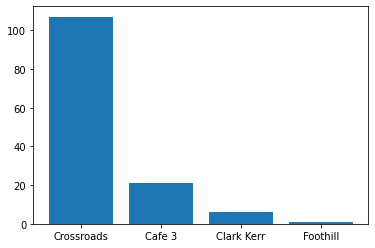

In [10]:
data = open(filename, 'r')
counts = {'Crossroads': 0, 'Cafe 3': 0, 'Clark Kerr': 0, 'Foothill': 0}

# count visits to each dininghall
for line in data:
    dininghall = line.split('|')[1][:-1]
    if 'Crossroad' in dininghall: counts['Crossroads'] += 1
    if 'Cafe' in dininghall: counts['Cafe 3'] += 1
    if 'Clark' in dininghall: counts['Clark Kerr'] += 1
    if 'Foothill' in dininghall: counts['Foothill'] += 1
print(counts)

data.close()

# display counts in bar chart
plt.bar(*zip(*counts.items()))
plt.show()

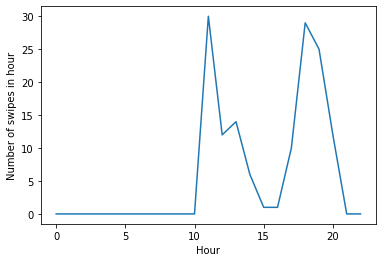

In [61]:
data = open(filename, 'r')
times = []
freq = [0 for i in range(23)]

# collect times from data
for line in data:
    datestring = re.findall(r'(\d?\d):\d\d:\d\d', line)[0] + ' ' + re.findall(r'AM|PM', line)[0]
    dt = datetime.strptime(datestring, '%I %p')
    times.append(dt)
    freq[dt.hour] += 1
    
plt.xlabel('Hour')
plt.ylabel('Number of swipes in hour')
plt.plot([i for i in range(23)], freq)